In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_NW_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,NaN,101.0,2.80,3.24,NaN,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,NaN,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,NaN,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,NaN,1.56,750
175,NaN,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,NaN,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	14
float64		column 3	22
float64		column 4	7
float64		column 5	7
float64		column 6	7
float64		column 7	0
float64		column 8	14
float64		column 9	8
float64		column 10	7
float64		column 11	8
float64		column 12	7
int64		column 13	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,171.000000,164.000000,156.000000,171.000000,171.000000,171.000000,178.000000,164.000000,170.000000,171.000000,170.000000,171.000000,178.000000
mean,13.011345,2.366159,2.377372,19.458480,99.807018,2.296842,2.029270,0.355549,1.585941,4.979181,0.957153,2.625848,746.893258
std,0.806175,1.126902,0.255070,3.355518,14.268565,0.625755,0.998859,0.120750,0.569473,2.247632,0.229456,0.693837,314.907474
min,11.030000,0.740000,1.700000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.270000,278.000000
25%,12.370000,1.625000,2.217500,17.150000,88.500000,1.765000,1.205000,0.260000,1.242500,3.230000,0.790000,2.005000,500.500000
50%,13.050000,1.875000,2.360000,19.500000,98.000000,2.350000,2.135000,0.325000,1.545000,4.600000,0.960000,2.780000,673.500000
75%,13.685000,3.105000,2.552500,21.500000,107.000000,2.800000,2.875000,0.430000,1.950000,6.050000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

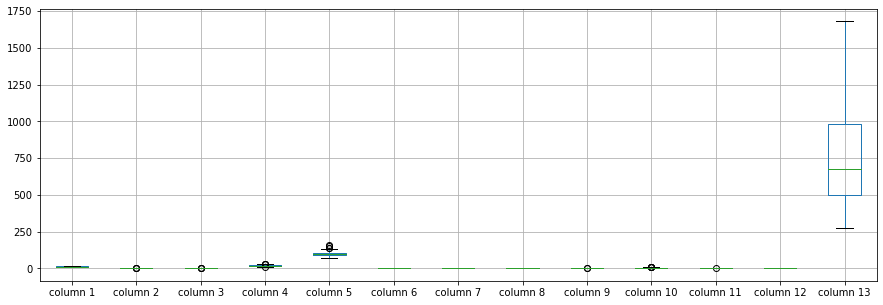

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.011345
column 2       2.366159
column 3       2.377372
column 4      19.458480
column 5      99.807018
column 6       2.296842
column 7       2.029270
column 8       0.355549
column 9       1.585941
column 10      4.979181
column 11      0.957153
column 12      2.625848
column 13    746.893258
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.096685,0.215448,-0.282865,0.238540,0.271262,0.246306,-0.214307,0.124513,0.538033,-0.075762,0.089636,0.633304
column 2,0.096685,1.000000,0.094461,0.315572,-0.085513,-0.321536,-0.410049,0.256620,-0.259516,0.227216,-0.522274,-0.369252,-0.204822
column 3,0.215448,0.094461,1.000000,0.395065,0.193492,0.111455,0.105895,0.250078,-0.029271,0.249188,-0.059491,-0.042668,0.184603
column 4,-0.282865,0.315572,0.395065,1.000000,-0.077365,-0.311317,-0.334003,0.371384,-0.183887,0.040541,-0.245914,-0.285601,-0.435410
column 5,0.238540,-0.085513,0.193492,-0.077365,1.000000,0.220423,0.182939,-0.222741,0.216158,0.177673,0.078084,0.062691,0.386446
column 6,0.271262,-0.321536,0.111455,-0.311317,0.220423,1.000000,0.861946,-0.484245,0.634897,-0.014405,0.430602,0.686929,0.500794
column 7,0.246306,-0.410049,0.105895,-0.334003,0.182939,0.861946,1.000000,-0.541906,0.663587,-0.156617,0.532782,0.780597,0.494193
column 8,-0.214307,0.256620,0.250078,0.371384,-0.222741,-0.484245,-0.541906,1.000000,-0.325991,0.100791,-0.238941,-0.494720,-0.319142
column 9,0.124513,-0.259516,-0.029271,-0.183887,0.216158,0.634897,0.663587,-0.325991,1.000000,-0.028296,0.300634,0.496936,0.343146
column 10,0.538033,0.227216,0.249188,0.040541,0.177673,-0.014405,-0.156617,0.100791,-0.028296,1.000000,-0.513590,-0.417645,0.311934


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [13,13+95,13+95+95,13+95+95,13+95+95+95+95,13+95+95+95+95+95,13+95+95+95+95+95+95,13+95+95+95+95+95,13+95+95+95+95,13+95+95+95,13+95+95,13+95,13], vae_layer = False, seed = 950)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 956.7876808860085
Epoch: 1 , loss: 953.4389759410511
Epoch: 2 , loss: 959.8636863014915
Epoch: 3 , loss: 952.9859452681108
Epoch: 4 , loss: 957.9468494762074
Epoch: 5 , loss: 956.7375155362216
Epoch: 6 , loss: 954.5605413263494
Epoch: 7 , loss: 950.024941184304
Epoch: 8 , loss: 953.012617631392
Epoch: 9 , loss: 955.7660189541904
Epoch: 10 , loss: 956.2307739257812
Epoch: 11 , loss: 956.2303244850852
Epoch: 12 , loss: 949.2267345081676
Epoch: 13 , loss: 948.3078446821733
Epoch: 14 , loss: 949.0740800337358
Epoch: 15 , loss: 948.2566861239346
Epoch: 16 , loss: 944.8464133522727
Epoch: 17 , loss: 945.3400823419744
Epoch: 18 , loss: 942.9321178089489
Epoch: 19 , loss: 944.5880792791194
Epoch: 20 , loss: 940.8836337002841
Epoch: 21 , loss: 938.8097312233665
Epoch: 22 , loss: 941.3803821910511
Epoch: 23 , loss: 944.1198508522727
Epoch: 24 , loss: 948.4377996271306
Epoch: 25 , loss: 936.9014615145596
Epoch: 2

In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
2,0.000000,0.0,0.000000,-15.890323,0.0,0.0,0.0,-0.045624,0.0,0.000000,0.000000,0.0,0
3,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
4,0.000000,0.0,-2.786636,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.000000,0.0,0.000000,-8.774369,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0
174,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.844297,0.0,0
175,-1.903317,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,-7.994281,0.000000,0.0,0
176,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(237.70937239977573, 10898.078031484092)

In [19]:
NRMS=numerator/denominator
NRMS


0.021812045363691038

In [20]:
new_df.iloc[66,:]

column 1      13.110000
column 2       1.010000
column 3       0.739326
column 4      15.000000
column 5      78.000000
column 6       1.187901
column 7       3.180000
column 8       0.260000
column 9       2.280000
column 10      5.300000
column 11      1.120000
column 12      3.180000
column 13    502.000000
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.230000,1.71,2.430000,15.600000,127.0,2.80,3.06,0.280000,2.29,5.640000,1.040000,3.92,1065
1,13.200000,1.78,2.140000,11.200000,100.0,2.65,2.76,0.260000,1.28,4.380000,1.050000,3.40,1050
2,13.160000,2.36,2.670000,2.709677,101.0,2.80,3.24,0.254376,2.81,5.680000,1.030000,3.17,1185
3,14.370000,1.95,2.500000,16.800000,113.0,3.85,3.49,0.240000,2.18,7.800000,0.860000,3.45,1480
4,13.240000,2.59,0.083364,21.000000,118.0,2.80,2.69,0.390000,1.82,4.320000,1.040000,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.710000,5.65,2.450000,11.725631,95.0,1.68,0.61,0.520000,1.06,7.700000,0.640000,1.74,740
174,13.400000,3.91,2.480000,23.000000,102.0,1.80,0.75,0.430000,1.41,7.300000,1.544297,1.56,750
175,11.366683,4.28,2.260000,20.000000,120.0,1.59,0.69,0.430000,1.35,2.205719,0.590000,1.56,835
176,13.170000,2.59,2.370000,20.000000,120.0,1.65,0.68,0.530000,1.46,9.300000,0.600000,1.62,840


In [22]:
imputations[-1].to_excel("Wine_NW_5(imp).xlsx", index=False, header=False)